# Table Of Contents :
* Problem Statement

# Problem Statement

**Aim :** To predict whether person makes over 50K a year based on census data.

**Data Source :** https://archive.ics.uci.edu/ml/datasets/Census+Income

**Data Information :**
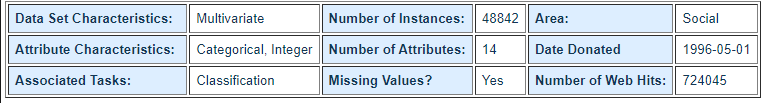

**Attribute Information :**

**age:** continuous.

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education_num:** continuous.

**marital_status:** Married-civ-spouse, Divorced, Never-married, Separated, 
Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex:** Female, Male.

**capital_gain:** continuous.

**capital_loss:** continuous.

**hours_per_week:** continuous.

**native_country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary :** 50K, <=50K.



# Import Libraries

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pymongo import MongoClient
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile
import urllib.request
import os 
from dotenv import load_dotenv

# Read Data From Url

In [17]:
uci_income_1_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
uci_income_2_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [29]:
df_1=pd.read_csv(uci_income_1_url, sep=',', header=None)
df_2=pd.read_csv(uci_income_2_url, sep=',',header=None, skiprows=1)

In [32]:
df_1.shape

(32561, 15)

In [31]:
df_2.shape

(16281, 15)

In [34]:
df = pd.concat([df_1,df_2])

In [35]:
df.shape

(48842, 15)

# Data Cleaning

In [40]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
# Assign column names
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary']

In [42]:
# Checking missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [43]:
# Checking duplicates
df.duplicated().sum()

29

In [44]:
# Removing duplicates
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)

In [48]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education_num   48813 non-null  int64 
 5   marital_status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital_gain    48813 non-null  int64 
 11  capital_loss    48813 non-null  int64 
 12  hours_per_week  48813 non-null  int64 
 13  native_country  48813 non-null  object
 14  salary          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [49]:
# Summary statistics of numeric features
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
# Split catgorical and numeric features
cat_features = [col for col in df.columns if df[col].dtype == object]
num_features = [col for col in df.columns if df[col].dtype == 'int64']

In [59]:
# See categorical features
cat_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [61]:
# See numerical features
num_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [87]:
# Check unique values for each categoric features
for col in cat_features:
    print(col.upper() + ":" + str(df[col].nunique()))
    print(df[col].value_counts())
    print('\n')


WORKCLASS:9
 Private             33879
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64


EDUCATION:16
 HS-grad         15777
 Some-college    10869
 Bachelors        8020
 Masters          2656
 Assoc-voc        2060
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: education, dtype: int64


MARITAL_STATUS:7
 Married-civ-spouse       22372
 Never-married            16098
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64


OCCUPATION:15
 Prof-sp

**Observations :**
* There are null values represented by '?' in the workclass, occupation and native_country features. They need to be treat as missing values.

In [102]:
# Replace ? values with NaN 
df.str.replace('?', np.NaN, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'str'

In [101]:
# Check unique values for each categoric features
for col in cat_features:
    print(col.upper() + ":" + str(df[col].nunique()))
    print(df[col].value_counts())
    print('\n')

WORKCLASS:9
 Private             33879
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64


EDUCATION:16
 HS-grad         15777
 Some-college    10869
 Bachelors        8020
 Masters          2656
 Assoc-voc        2060
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           954
 Prof-school       834
 9th               756
 12th              656
 Doctorate         594
 5th-6th           508
 1st-4th           245
 Preschool          82
Name: education, dtype: int64


MARITAL_STATUS:7
 Married-civ-spouse       22372
 Never-married            16098
 Divorced                  6630
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64


OCCUPATION:15
 Prof-sp